In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
height = 15
width = 15

vertices_count = height*width
edges_count = height*(width - 1) + (height - 1)*width

sample_size = 100
alphas = np.arange(1.0, 3.1, 0.2)

In [3]:
results = []

for name in ['exact', 'planar', 'decomp', 'trw']:

    data = np.load(name + '.npz')
    logpfs = data['logpfs'].reshape(-1, sample_size)
    marginals = data['marginals'].reshape(-1, sample_size,
            vertices_count + edges_count)

    edge_marginals = marginals[:, :, vertices_count:]

    vertex_marginal = marginals[:, :, (height//2)*width + width//2]

    results.append((logpfs, edge_marginals, vertex_marginal))

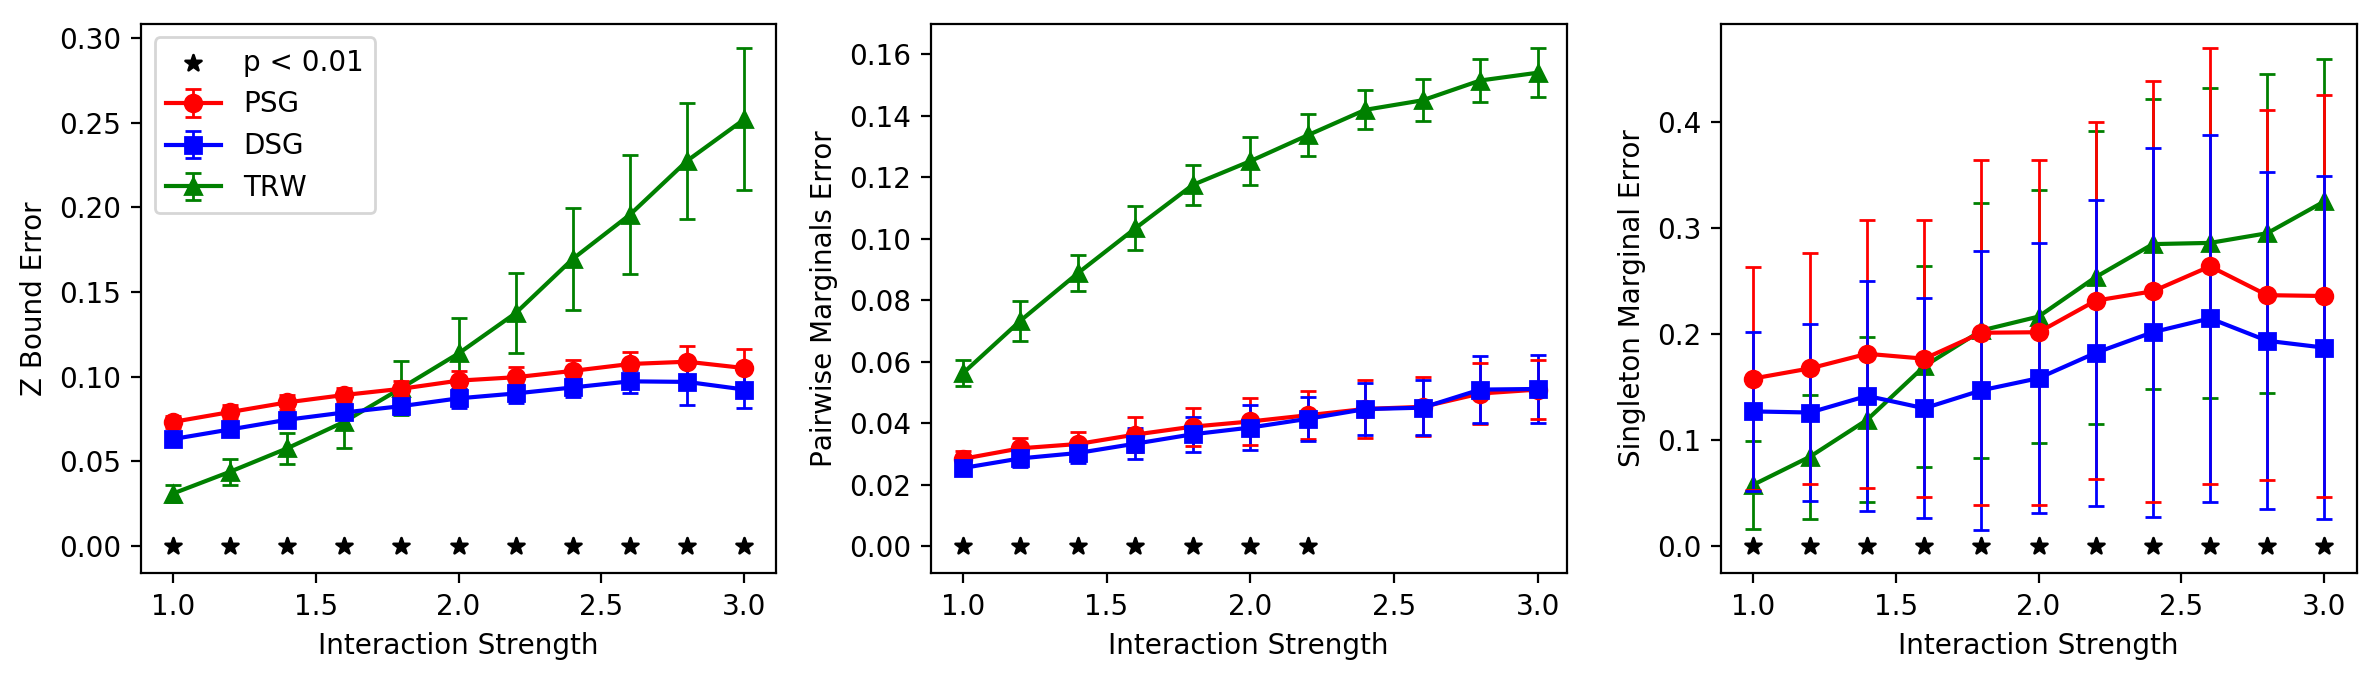

In [4]:
def get_significance_mask(error_diffs):

    p_values = []

    for diffs in error_diffs:
        p_values.append(stats.wilcoxon(diffs, alternative='greater')[1])

    p_values = np.array(p_values)

    return p_values*33 < 0.01

figure = plt.figure(figsize=(12, 3.5), dpi=200)

plt.subplot(131)

planar_logpf_errors = (results[1][0] - results[0][0])/(height*width)
decomp_logpf_errors = (results[2][0] - results[0][0])/(height*width)
planar_logpf_err_means = []
planar_logpf_err_stds = []
decomp_logpf_err_means = []
decomp_logpf_err_stds = []
logpf_error_diffs = []

# With a given seed, we get exactly one 'nan' among 1100 data points
for p_errors, d_errors in zip(planar_logpf_errors, decomp_logpf_errors):

    diffs = p_errors - d_errors
    diffs = diffs[~np.isnan(diffs)]
    logpf_error_diffs.append(diffs)

    p_errors = p_errors[~np.isnan(p_errors)]
    planar_logpf_err_means.append(p_errors.mean())
    planar_logpf_err_stds.append(p_errors.std())

    d_errors = d_errors[~np.isnan(d_errors)]
    decomp_logpf_err_means.append(d_errors.mean())
    decomp_logpf_err_stds.append(d_errors.std())

mask = get_significance_mask(logpf_error_diffs)

trw_logpf_err_means = (results[3][0] - results[0][0]).mean(axis=1)/(height*width)
trw_logpf_err_stds = (results[3][0] - results[0][0]).std(axis=1)/(height*width)

plt.errorbar(alphas, planar_logpf_err_means, yerr=planar_logpf_err_stds,
             fmt='ro-', label='PSG', capsize=3, elinewidth=1)
plt.errorbar(alphas, decomp_logpf_err_means, yerr=decomp_logpf_err_stds,
             fmt='bs-', label='DSG', capsize=3, elinewidth=1)
plt.errorbar(alphas, trw_logpf_err_means, yerr=trw_logpf_err_stds,
             fmt='g^-', label='TRW', capsize=3, elinewidth=1, zorder=-10)
plt.scatter(alphas[mask], np.zeros_like(alphas)[mask], c='k', marker='*',
            label='p < 0.01', zorder=10)
plt.legend()
plt.xlabel('Interaction Strength')
plt.ylabel('Z Bound Error')

plt.subplot(132)

planar_marg_errors = np.absolute(results[1][1] - results[0][1]).mean(axis=2)/2
decomp_marg_errors = np.absolute(results[2][1] - results[0][1]).mean(axis=2)/2
planar_marg_err_means = []
planar_marg_err_stds = []
decomp_marg_err_means = []
decomp_marg_err_stds = []
marg_error_diffs = []

for p_errors, d_errors in zip(planar_marg_errors, decomp_marg_errors):

    diffs = p_errors - d_errors
    diffs = diffs[~np.isnan(diffs)]
    marg_error_diffs.append(diffs)

    p_errors = p_errors[~np.isnan(p_errors)]
    planar_marg_err_means.append(p_errors.mean())
    planar_marg_err_stds.append(p_errors.std())

    d_errors = d_errors[~np.isnan(d_errors)]
    decomp_marg_err_means.append(d_errors.mean())
    decomp_marg_err_stds.append(d_errors.std())

mask = get_significance_mask(marg_error_diffs)

trw_marg_err_means = np.absolute(results[3][1] - results[0][1]).mean(axis=2).mean(axis=1)/2
trw_marg_err_stds = np.absolute(results[3][1] - results[0][1]).mean(axis=2).std(axis=1)/2

plt.errorbar(alphas, planar_marg_err_means, yerr=planar_marg_err_stds,
             fmt='ro-', capsize=3, elinewidth=1)
plt.errorbar(alphas, decomp_marg_err_means, yerr=decomp_marg_err_stds,
             fmt='bs-', capsize=3, elinewidth=1)
plt.errorbar(alphas, trw_marg_err_means, yerr=trw_marg_err_stds,
             fmt='g^-', capsize=3, elinewidth=1, zorder=-10)
plt.scatter(alphas[mask], np.zeros_like(alphas)[mask], c='k', marker='*',
            label='p < 0.01', zorder=10)
plt.xlabel('Interaction Strength')
plt.ylabel('Pairwise Marginals Error')

plt.subplot(133)

planar_central_errors = np.absolute(results[1][2] - results[0][2])/2
decomp_central_errors = np.absolute(results[2][2] - results[0][2])/2
planar_central_err_means = []
planar_central_err_stds = []
decomp_central_err_means = []
decomp_central_err_stds = []
central_error_diffs = []

for p_errors, d_errors in zip(planar_central_errors, decomp_central_errors):

    diffs = p_errors - d_errors
    diffs = diffs[~np.isnan(diffs)]
    central_error_diffs.append(diffs)

    p_errors = p_errors[~np.isnan(p_errors)]
    planar_central_err_means.append(p_errors.mean())
    planar_central_err_stds.append(p_errors.std())

    d_errors = d_errors[~np.isnan(d_errors)]
    decomp_central_err_means.append(d_errors.mean())
    decomp_central_err_stds.append(d_errors.std())

mask = get_significance_mask(central_error_diffs)

trw_central_err_means = np.absolute(results[3][2] - results[0][2]).mean(axis=1)/2
trw_central_err_stds = np.absolute(results[3][2] - results[0][2]).std(axis=1)/2

plt.errorbar(alphas, planar_central_err_means, yerr=planar_central_err_stds,
             fmt='ro-', capsize=3, elinewidth=1)
plt.errorbar(alphas, decomp_central_err_means, yerr=decomp_central_err_stds,
             fmt='bs-', capsize=3, elinewidth=1)
plt.errorbar(alphas, trw_central_err_means, yerr=trw_central_err_stds,
             fmt='g^-', capsize=3, elinewidth=1, zorder=-10)
plt.scatter(alphas[mask], np.zeros_like(alphas)[mask], c='k', marker='*',
            label='p < 0.01', zorder=10)
plt.xlabel('Interaction Strength')
plt.ylabel('Singleton Marginal Error')

plt.tight_layout()
plt.show()

figure.savefig("plots.pdf", bbox_inches='tight')